In [37]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
from util.fft import *
from util.jg import *
from scipy.io import loadmat

In [38]:
ssfp_data = loadmat("vivodata/meas_MID495_bSSFP_8PC_nograd_FID42735_image.mat")["data"] 
[ny,nx,ph, nc] = ssfp_data.shape

D = np.reshape(ssfp_data, [ny * nx * ph, nc])
U, S, Vt = np.linalg.svd(D, full_matrices=False)
Nc = 6
ssfp_data = np.dot(D, Vt.T[:, :Nc]).reshape(ny, nx, ph, Nc)

In [39]:
data1 = loadmat("vivodata/meas_MID504_FEMR_nograd_PC0_fa25_FID42744_image.mat")["data"]
data2 = loadmat("vivodata/meas_MID505_FEMR_nograd_PC45_fa25_FID42745_image.mat")["data"]
data3 = loadmat("vivodata/meas_MID506_FEMR_nograd_PC90_fa25_FID42746_image.mat")["data"]
data4 = loadmat("vivodata/meas_MID507_FEMR_nograd_PC135_fa25_FID42747_image.mat")["data"]
femr_data = np.concatenate([data1, data2, data3, data4], 2) 
[ny,nx,ph, nc] = femr_data.shape

D = np.reshape(femr_data, [ny * nx * ph, nc])
U, S, Vt = np.linalg.svd(D, full_matrices=False)
Nc = 6
femr_data = np.dot(D, Vt.T[:, :Nc]).reshape(ny, nx, ph, Nc)

In [40]:
ssfp_image = ifft2c(ssfp_data)
ssfp_image = ssfp_image  / normalization_factor(ssfp_image)
ssfp_data = fft2c(ssfp_image)

ssfp_truth = rsos(rsos(ssfp_image,-1),-1)

[ny, nx, pc, nc] = ssfp_data.shape
ssfp_acs = acs(ssfp_data, (32, 32))
ssfp_dataR = np.zeros([ny, nx, pc, nc], dtype = complex)
R = 4
ssfp_dataR[::R] = ssfp_data[::R]
ssfp_recon = joint_grappa(ssfp_dataR, ssfp_acs, kh = 2, kw = 5,lamda = 2e-11, R = R)
print(MSE(ssfp_truth,ssfp_recon))

1.5565727430350674e-08


In [41]:
femr_image = ifft2c(femr_data)
femr_image = femr_image  / normalization_factor(femr_image)
femr_data = fft2c(femr_image)

femr_truth = rsos(rsos(femr_image,-1),-1)

[ny, nx, pc, nc] = femr_data.shape
femr_acs = acs(femr_data, (32, 32))
femr_dataR = np.zeros([ny, nx, pc, nc], dtype = complex)
femr_dataR[::R] = femr_data[::R]
femr_recon = joint_grappa(femr_dataR, femr_acs, kh = 2, kw = 5,lamda = 2e-11, R = R)
print(MSE(femr_truth,femr_recon))

1.3018228566145228e-08


(-0.5, 255.5, 255.5, -0.5)

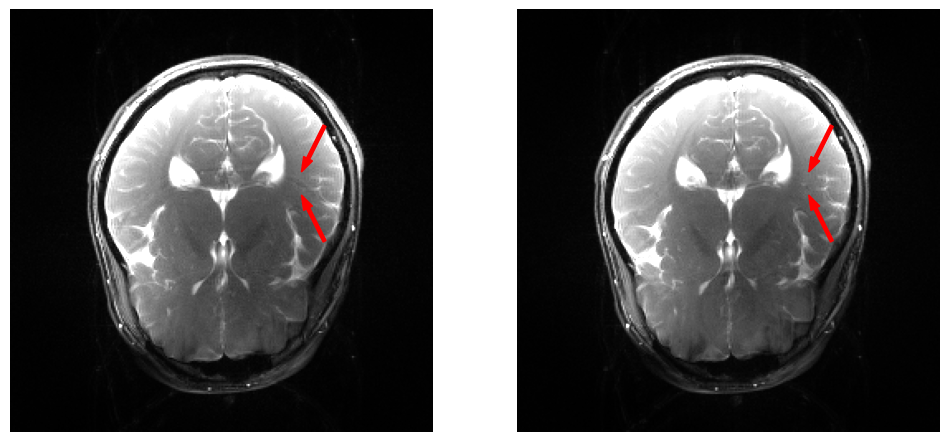

In [69]:
# You can still see some aliasing artifacts due to the undersampling in bSSFP, as indicated by the red arrow
plt.figure(figsize = (12,8))
vmax = 0.01
plt.subplot(121)
plt.imshow(abs(ssfp_recon), cmap = "gray", vmax = vmax)
plt.arrow(x=190, y=140, dx=-10, dy=-20, color='red', width=2)
plt.arrow(x=190, y=70, dx=-10, dy=20, color='red', width=2)
plt.axis("off")
plt.subplot(122)
plt.imshow(abs(femr_recon), cmap = "gray", vmax = vmax)
plt.arrow(x=190, y=140, dx=-10, dy=-20, color='red', width=2)
plt.arrow(x=190, y=70, dx=-10, dy=20, color='red', width=2)
plt.axis("off")

In [32]:
ssfp_image = ifft2c(ssfp_data)
ssfp_image = ssfp_image  / normalization_factor(ssfp_image)
ssfp_data = fft2c(ssfp_image)

ssfp_truth = rsos(rsos(ssfp_image,-1),-1)

[ny, nx, pc, nc] = ssfp_data.shape
ssfp_acs = acs(ssfp_data, (32, 32))
ssfp_dataR = np.zeros([ny, nx, pc, nc], dtype = complex)
R = 8
ssfp_dataR[::R] = ssfp_data[::R]
ssfp_recon = joint_grappa(ssfp_dataR, ssfp_acs, kh = 2, kw = 5,lamda = 2e-11, R = R)
print(MSE(ssfp_truth,ssfp_recon))

1.8603878718007836e-06


In [33]:
femr_image = ifft2c(femr_data)
femr_image = femr_image  / normalization_factor(femr_image)
femr_data = fft2c(femr_image)

femr_truth = rsos(rsos(femr_image,-1),-1)

[ny, nx, pc, nc] = femr_data.shape
femr_acs = acs(femr_data, (32, 32))
femr_dataR = np.zeros([ny, nx, pc, nc], dtype = complex)
femr_dataR[::R] = femr_data[::R]
femr_recon = joint_grappa(femr_dataR, femr_acs, kh = 2, kw = 5,lamda = 2e-11, R = R)
print(MSE(femr_truth,femr_recon))

1.1651498320202572e-06


(-0.5, 255.5, 255.5, -0.5)

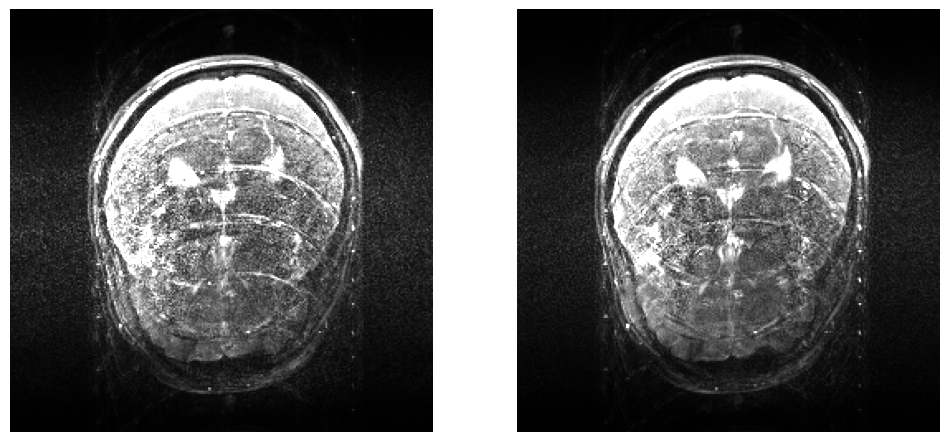

In [34]:
plt.figure(figsize = (12,8))
vmax = 0.01
plt.subplot(121)
plt.imshow(abs(ssfp_recon), cmap = "gray", vmax = vmax)
plt.axis("off")
plt.subplot(122)
plt.imshow(abs(femr_recon), cmap = "gray", vmax = vmax)
plt.axis("off")